In [1]:
using Pkg
Pkg.activate(".")

  Activating new project at `~/MEGA/EMAp/Julia_Tutorials/Generative_Art`


In [12]:
using Luxor
using Thebes
using Colors, ColorSchemes
using Meshes

In [18]:
function lighten(col::Colorant, f)
    c = convert(RGB, col)
    return RGB(f * c.r, f* c.g, f * c.b)
end

function drawobject(o;
        color=colorant"red")
    setlinejoin("bevel")
    
    if !isempty(o.faces)
        @layer begin
            for (n, f) in enumerate(o.faces)
                vs = o.vertices[f]
                sn = surfacenormal(vs)
                ang = anglebetweenvectors(sn, eyepoint())
                sl = slope(O, vs[1])
                pin(vs, gfunction = (p3, p2) -> begin
                    sethue(lighten(color, rescale(ang, π, 0, 0, 2)))
                    setopacity(0.8)
                    poly(p2, :fill)
                    sethue("grey30")
                    poly(p2, :stroke)
                end)
            end
        end
    end
end

function drawsphere(size, origin, color)
    S = Meshes.Sphere((0.,0.,0.), 1.)
    Smesh = Meshes.discretize(S, Meshes.RegularDiscretization(30,30));
    vertices = [Point3D(p.coords) for p in Smesh.points]
    faces = [[f.indices...] for f in Smesh.topology.connec];
    s1 = make((vertices,faces))
    
    scaleby!(s1, size, size, size)
    setline(0.5)
    moveby!(s1, origin)
    sortfaces!(s1)
    drawobject(s1, color=color)
end


drawsphere (generic function with 3 methods)

In [38]:
jblue = ColorSchemes.julia.colors[1]
jred = ColorSchemes.julia.colors[2]
jgreen = ColorSchemes.julia.colors[3];

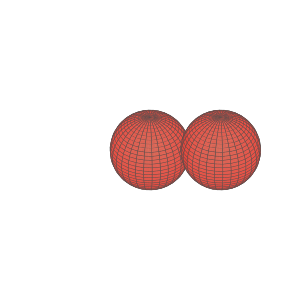

In [47]:
d = Drawing(300,300,:svg)
Luxor.origin()
eyepoint(200,200,200)
r = 40
drawsphere(r, Point3D(0, 0, 0),jred)
drawsphere(r, Point3D(-50, 50, 0),jred)
finish()
d